In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.nonparametric.kde import KDEUnivariate
from tqdm import tqdm_notebook

In [2]:
#data = pd.read_csv('./data_Sality.csv', nrows=450 * 1000)
data = pd.read_csv('./data_Bunitu.csv')

In [3]:
print(len(data))
data.dropna(inplace=True)
print(len(data))

664620
664615


In [127]:
data.head(7)

,No.,Time,Source,Destination,Protocol,Length,Info
1,2,7.063600,fe80::31aa:edaf:e8df:b0f1,ff02::1:2,DHCPv6,147,Solicit XID: 0x366a8e CID: 000100011751c322080...
2,3,7.302760,PcsCompu_52:d2:50,Broadcast,ARP,42,Who has 10.0.2.2? Tell 10.0.2.110
3,4,7.302920,RealtekU_12:35:02,PcsCompu_52:d2:50,ARP,42,10.0.2.2 is at 52:54:00:12:35:02
4,5,7.334053,PcsCompu_52:d2:50,Broadcast,ARP,42,Who has 10.0.2.110? Tell 0.0.0.0
5,6,7.334188,::,ff02::1:ffdf:b0f1,ICMPv6,78,Neighbor Solicitation for fe80::31aa:edaf:e8df...
6,7,7.334242,fe80::31aa:edaf:e8df:b0f1,ff02::2,ICMPv6,70,Router Solicitation from 08:00:27:52:d2:50
7,8,7.334314,fe80::31aa:edaf:e8df:b0f1,ff02::16,ICMPv6,90,Multicast Listener Report Message v2


/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [5]:
for column in data.columns:
    print(column, '\t : ', len(np.unique(data[column])))

No. 	 :  449987
Time 	 :  449962
Source 	 :  1753
Destination 	 :  4748
Protocol 	 :  20
Length 	 :  498
Info 	 :  404118


In [6]:
print(np.unique(data.Protocol))

['ARP' 'CAT-TP' 'CoAP' 'DHCPv6' 'DNS' 'Elasticsearch' 'HTTP' 'ICMP'
 'ICMPv6' 'IMF' 'KINK' 'LLMNR' 'MIH' 'NBNS' 'RTCP' 'RX' 'SMTP' 'TCP'
 'TETRA' 'UDP']


# Test of IsolationForest

In [35]:
iso_frame = data.copy()

iso_frame.drop(columns=['No.', 'Source', 'Destination', 'Info'], inplace=True)
iso_frame = pd.get_dummies(iso_frame, columns=['Protocol'])

iso_frame['Time'] = list(map(int, iso_frame['Time'].values))

In [44]:
iso_frame = data.copy()

iso_frame.drop(columns=['No.', 'Source', 'Destination', 'Info'], inplace=True)
iso_frame = pd.get_dummies(iso_frame, columns=['Protocol'])

iso_frame['Time'] = list(map(int, iso_frame['Time'].values))
names = list(iso_frame.columns)
names.remove('Time')

iso_frame2 = pd.DataFrame(columns=names)

grouped = iso_frame.groupby('Time')
for col in names:
    iso_frame2[col] = grouped[col].agg(np.sum)

In [45]:
iso_frame2.head(7)

,Length,Protocol_ARP,Protocol_CAT-TP,Protocol_CoAP,Protocol_DHCPv6,Protocol_DNS,Protocol_Elasticsearch,Protocol_HTTP,Protocol_ICMP,Protocol_ICMPv6,...,Protocol_KINK,Protocol_LLMNR,Protocol_MIH,Protocol_NBNS,Protocol_RTCP,Protocol_RX,Protocol_SMTP,Protocol_TCP,Protocol_TETRA,Protocol_UDP
Time,,,,,,,,,,,,,,,,,,,,,
54,370,1,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
55,42,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,42,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,70,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62,70,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
76,147,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,147,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [10]:
iso = IsolationForest(n_jobs=-1)

iso.fit(iso_frame2)

/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=-1, random_state=None,
        verbose=0)

In [13]:
pred_out = iso.predict(iso_frame2)

/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [14]:
print('1  :', len(pred_out[pred_out == 1]))
print('-1 :', len(pred_out[pred_out == -1]))

1  : 77813
-1 : 8658


/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [30]:
kde_frame = pred_out.copy()
kde_frame[kde_frame == 1] = 0
kde_frame[kde_frame == -1] = 1
bw = 30
compresed = []
for i in range(0, len(kde_frame) - bw, bw):
    compresed.append(np.sum(kde_frame[i:i+bw]))
compresed = np.array(compresed)

In [4]:
def apply_ISOForest(df, contamination=0.1, columns_to_use=[]):
    '''
    input -- pandas data frame with columns [No. Time Source Destination Protocol Length Info]
    
    output -- numpy array with {0, 1} where 1 is anomaly
    '''
    iso_frame = df.copy()

    iso_frame.drop(columns=['No.', 'Source', 'Destination', 'Info'], inplace=True)
    iso_frame = pd.get_dummies(iso_frame, columns=['Protocol'])

    iso_frame['Time'] = list(map(int, iso_frame['Time'].values))
    
    names = []
    if type(columns_to_use) == str:
        names = ['Length', 'Protocol_' + columns_to_use]
    if type(columns_to_use) == list:
        if len(columns_to_use) == 0:
            names = list(iso_frame.columns)
            names.remove('Time')
        else:
            names2 = []
            for name in names:
                if len(name.split('_')) != 0:
                    continue
                elif name.split('_')[1] in columns_to_use:
                    name2.append('Protocol_' + name)
            names = names2
            names.append('Length')

    iso_frame2 = pd.DataFrame(columns=names)

    grouped = iso_frame.groupby('Time')
    
    for col in names:
        iso_frame2[col] = grouped[col].agg(np.sum)
    
    
    iso = IsolationForest(n_jobs=-1, n_estimators=20)
    iso.fit(iso_frame2)
    pred_out = iso.predict(iso_frame2)
    pred_out[pred_out == 1] = 0
    pred_out[pred_out == -1] = 1
    return pred_out

In [144]:
buffer = apply_ISOForest(data, contamination=0.01, columns_to_use='TCP')

/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


['Length', 'Protocol_TCP']


In [5]:
def create_segments(ar, gap_ignore=0.03, remove_less_when=0.02):
    '''
    input -- array of {0, 1} where 1 is anomaly
    
    output -- numpy array [[s1, f1], ..., [sn, fn]] where [s1, f1] - segment of anomaly
    '''
    ar = list(ar)
    ar.append(0)
    ar = np.array(ar)
    whole_len = len(ar)
    segm1 = []
    start = 0
    now_seg = False
    for i, x in enumerate(ar):
        if x == 1:
            if now_seg == False:
                start = i
                now_seg = True
                continue
        if x == 0:
            if now_seg == True:
                segm1.append([start, i - 1])
                now_seg = False
                continue
#     segm3 = []
#     for seg in segm1:
#         if seg[1] - seg[0] >= remove_less_when * whole_len:
#             segm3.append(seg)
    segm2 = []
    start = segm1[0][0]
    now_seg = False
    for i in range(len(segm1) - 1):
        if abs(segm1[i][1] - segm1[i + 1][0]) <= whole_len * gap_ignore:
            if now_seg == True:
                continue
            else:
                now_seg = True
                start = segm1[i][0]
                continue
        else:
            if now_seg == False:
                segm2.append(segm1[i])
                continue
            else:
                now_seg = False
                segm2.append([start, segm1[i][1]])
                start = -1
                continue
    if now_seg == True:
        segm2.append([start, segm1[-1][1]])
    if segm2[-1][1] != segm1[-1][1]:
        segm2.append(segm1[-1])
    segm3 = []
    for seg in segm2:
        if seg[1] - seg[0] >= remove_less_when * whole_len:
            segm3.append(seg)
    return segm3

In [79]:
test = [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
print(len(test))
print(create_segments(test, remove_less_when=0.01, gap_ignore=0.08))

for i in range(len(test)):
    print(i, '\t', test[i])

42
[[1, 8], [14, 22], [26, 34]]
0 	 0
1 	 1
2 	 1
3 	 1
4 	 0
5 	 1
6 	 1
7 	 1
8 	 1
9 	 0
10 	 0
11 	 0
12 	 0
13 	 0
14 	 1
15 	 1
16 	 1
17 	 0
18 	 0
19 	 1
20 	 1
21 	 1
22 	 1
23 	 0
24 	 0
25 	 0
26 	 1
27 	 0
28 	 1
29 	 0
30 	 1
31 	 0
32 	 1
33 	 0
34 	 1
35 	 0
36 	 0
37 	 0
38 	 0
39 	 0
40 	 0
41 	 1


/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [6]:
def iso_get_image(df, file_to_save=None, figsize=(20, 14), iso_contamination=0.02, iso_columns_to_use=[]):
    seg = create_segments(apply_ISOForest(columns_to_use=iso_columns_to_use, 
                                          contamination=iso_contamination),
                         gap_ignore=0.004,
                         remove_less_when=0.01)
    plt.figure(figsize=figsize)
    for s in seg:
        plt.hlines(y=0, xmin=s[0], xmax=s[1])
    plt.grid(ls=':')
    if file_to_save is None:
        plt.show()
    else:
        plt.savefig(fname=file_to_save, format='png', dpi=256)

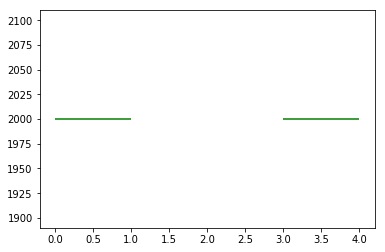

/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [82]:
drow_segments([[0, 1], [3, 4]])

In [38]:
print(compresed.min(), compresed.max(), compresed.mean(), compresed.std())
print(len(compresed))
print(len(compresed[compresed > compresed.mean() + 2 * compresed.std()]))

0 27 3.0080005333688913 4.345679270757104
14999
1149


In [149]:
buffer = apply_ISOForest(data, contamination=0.01, columns_to_use=['TCP', 'UDP'])

['Length']


/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


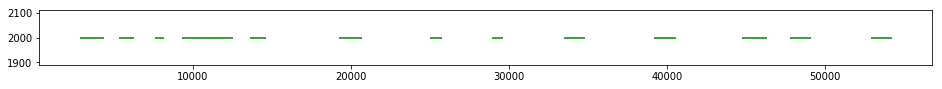

/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [150]:
plt.figure(figsize=(16, 1))
drow_segments(create_segments(buffer, remove_less_when=0.01, gap_ignore=0.005))
plt.show()

In [77]:
test = np.array(list(map(int, data.Time)))

plt.figure(figsize=(14, 6))
buf = data.Time[pred_out == -1]
plt.scatter(buf[::10], np.ones_like(buf)[::10] * 1000, alpha=0.002)
buf2 = data.Time
plt.hist(test, bins=len(test) // 100)
drow_segments(create_segments(apply_ISOForest(data)))
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 449987 but corresponding boolean dimension is 86471

<Figure size 1008x432 with 0 Axes>

/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


## Количество пакетов по времени

In [49]:
test = np.array(list(map(int, data.Time)))

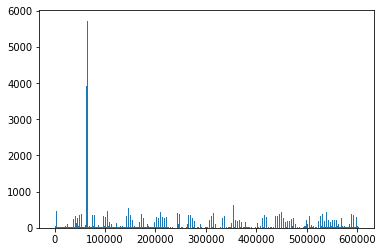

In [19]:
plt.hist(test, bins=len(test) // 100)
plt.show()

In [7]:
def unique_pac_per_time(df, file_to_save=None, figsize=(20, 14)):
    test = np.array(list(map(int, df.Time)))
    n_bins = len(test) // 60
    if n_bins > 10**6:
        n_bins /= 10
    plt.figure(figsize=figsize)
    plt.hist(test, bins=n_bins)
    plt.grid(ls=':')
    if file_to_save is None:
        plt.show()
    else:
        plt.savefig(fname=file_to_save, format='png', dpi=64)

In [ ]:
unique_pac_per_time(data)

/home/michael/environments/virt-env-DS2/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


KeyboardInterrupt: 

## Уникальные sources and destination

In [ ]:
def unique_sor_dest_per_time(df, file_to_save=None, figsize=(20, 14)):
    # TODO ! ! ! ! ! ! 
    test = np.array(list(map(int, df.Time)))
    n_bins = len(test) // 60
    if n_bins > 10**7:
        n_bins /= 10
    plt.figure(figsize=figsize)
    plt.hist(test, bins=n_bins)
    plt.grid(ls=':')
    if file_to_save is None:
        plt.show()
    else:
        plt.savefig(fname=file_to_save, format='png', dpi=256)

# Summary

In [8]:
def get_summary(df, figsize=(16, 10), file_to_save=None):
    fig, ax = plt.subplots(figsize=figsize)

    labels=[]
    index_of_total = len(np.unique(df.Protocol))
    for i, proto in enumerate(np.unique(df.Protocol)):
        segms = create_segments(apply_ISOForest(df,
                                                columns_to_use=proto, 
                                                contamination=0.01),
                                gap_ignore=0.004,
                                remove_less_when=0.01)
        labels.append(proto)
        for i in range(len(segms)):
            segms[i][1] -= segms[i][0]
            segms[i] = tuple(segms[i])
        ax.broken_barh(segms, (i-0.4,0.8), color='blue', alpha=0.1)
        ax.broken_barh(segms, (index_of_total-0.4,0.8), color='red', alpha=0.07)

    labels.append('Total')
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels) 
    ax.set_xlabel("time [s]")
    #plt.tight_layout()
    if file_to_save is None:
        plt.show()
    else:
        plt.savefig(fname=file_to_save, format='png', dpi=100)

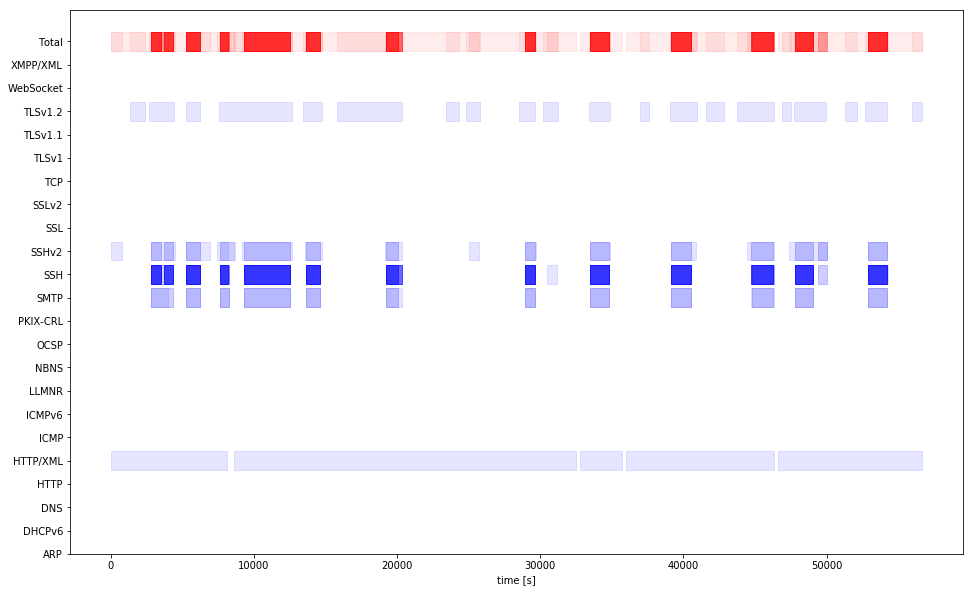

In [48]:
get_summary(data, file_to_save='summary_2')

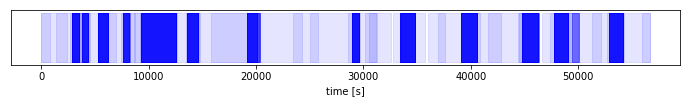

In [40]:
fig, ax = plt.subplots(figsize=(12, 1))

for segs in all_segms:
    ax.broken_barh(segs, (0.2,0.8), color='blue', alpha=0.1)

ax.set_yticks(range(1))
ax.set_yticklabels(['final']) 
ax.set_xlabel("time [s]")
#plt.tight_layout()       
plt.show()

In [22]:
def is_segm_informative(segments, max_len=None, informativity_bounds=[0.8, 0.05]):
    segments = np.array(segments)
    if max_len is None:
        max_len = segments.max()
    sum_len = 0
    for s in segments:
        sum_len += s[1] - s[0]
    if sum_len > max_len * informativity_bounds[0] or sum_len < max_len * informativity_bounds[1]:
        return False
    return True


def seg_sum(df, segs, labels):
    '''
    input -- segs : array of array of segments, like array of [[s1, f1], ..., [sn, fn]] 
    outout -- 
    '''
    inf_labels = []
    for s, lab in zip(segs, labels):
        if is_segm_informative(s):
            inf_labels.append(labels)
    ans_segms = create_segments(apply_ISOForest(df,
                                            columns_to_use=inf_labels, 
                                            contamination=0.01),
                            gap_ignore=0.0001,
                            remove_less_when=0.01)
    return ans_segms

In [23]:
final_seg = seg_sum(data, all_segms, labels)

In [26]:
def drow_segments(segs):
    fig, ax = plt.subplots(figsize=(12,2))
    
    ax.broken_barh(segs, (0.2, 0.8), color='blue', alpha=0.1)

    ax.set_yticks(range(1))
    ax.set_yticklabels(['final']) 
    ax.set_xlabel("time [s]")
    plt.tight_layout()       
    plt.show()

[]


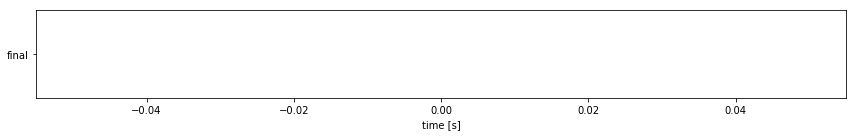

In [28]:
print(final_seg)
drow_segments(final_seg)

# Func creating dataframe

In [43]:
def get_summary_DF(df):
    whole_len = int(np.array(df.Time).max())
    final_seg = np.zeros(whole_len)
    reason = []
    for i, proto in enumerate(np.unique(df.Protocol)):
        segms = create_segments(apply_ISOForest(df,
                                                columns_to_use=proto, 
                                                contamination=0.01),
                                gap_ignore=0.004,
                                remove_less_when=0.01)
        sum_len = 0
        for s in segms:
            final_seg[s[0]:s[1]] += 1
            sum_len += s[1] - s[0]
        reason.append((sum_len, proto))

    pixels = final_seg >= final_seg.mean() + 5 * final_seg.std()
    final_seg[pixels] = 1
    final_seg[np.logical_not(pixels)] = 0
    final_seg = create_segments(ar=final_seg, gap_ignore=0.0005, remove_less_when=0.001)
    ans_df = pd.DataFrame(columns=['Время начала', 'Время конца', 'Причина'])
    for seg in final_seg:
        ans_df = ans_df.append({'Время начала' : seg[0], 
                       'Время конца' : seg[1], 
                       'Причина' : 'Повышенное количество аномалий в протоколах : ' + 
                       ' '.join([x[1] for x in reason if x[0] > whole_len * 0.007 ])
                               }, 
                              ignore_index=True)
    return ans_df

In [44]:
a = get_summary_DF(data)

[(55427, 'ARP'), (20232, 'DHCPv6'), (32688, 'DNS'), (15480, 'HTTP'), (15522, 'HTTP/XML'), (16341, 'ICMP'), (15502, 'ICMPv6'), (15759, 'LLMNR'), (15448, 'NBNS'), (15749, 'OCSP'), (15772, 'PKIX-CRL'), (15749, 'SMTP'), (15472, 'SSH'), (15744, 'SSHv2'), (15749, 'SSL'), (15466, 'SSLv2'), (16938, 'TCP'), (15716, 'TLSv1'), (16772, 'TLSv1.1'), (15676, 'TLSv1.2'), (15748, 'WebSocket'), (15747, 'XMPP/XML')]
whlen 2145184


In [47]:
a.Причина[0]

'Повышенное количество аномалий в протоколах : ARP DHCPv6 DNS'

In [46]:
print(2145184 * 0.01)

21451.84
